## Global Runoff Data Center streamflow data pre-processing

#### The main objective of this script is to perform a pre-processing analysis of the available streamflow data from the GRDC, having a close look at the countries, time-lengh availability and gaps.

#### This is part II, therefore there is already the gaps and plots check. The reading and pre-processing of the original dataset is available in the first script so-called part I. 

Written by: Thiago Victor Medeiros do Nascimento

References:

1. Global Runoff Data Center: https://www.bafg.de/GRDC/EN/Home/homepage_node.html

First we import some useful modules:

In [1]:
import geopandas as gpd                                      # Pandas for geospatial analysis
from shapely.geometry import Point, Polygon                  # Module used for geospatial analysis     
import pymannkendall as mk                                   # Module used for trend-computation
from plotly.offline import plot
import contextily as cx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings                                              
import datetime                                              # Datetime module pretty useful for time-series analysis
import tqdm as tqdm                                          # Useful module to access the progress bar of a loop
import os
import glob
warnings.simplefilter(action='ignore', category=Warning)     # Module useful for taking out some unecessary warnings


%config Completer.use_jedi = False                           # This improve the auto-fill function

import geospatialfunctions as geospatialfunctions            # Geospatialfunctions is a module with useful functions

First we should set our directory:

In [2]:
path = r"C:\Users\nascimth\Documents\Thiago\Eawag\Python\Datasets"
os.chdir(path)
os.getcwd()

'C:\\Users\\nascimth\\Documents\\Thiago\\Eawag\\Python\\Datasets'

Here we can import the full GRDC network and time-series information:

4. Gaps check:

At this part we can check for gaps in our time-series:

In [3]:
#First we read our data:
timeseriesfinal = pd.read_csv(r'GRDC\timeseries\timeseries_grdc.csv', encoding='latin-1', engine='python', delimiter = ",",
                             index_col = 0)

timeseriesfinal

6111100  6112070  6112080  6112090  6112100  6113050  6113100  \
1900-09-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-09-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-09-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-09-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-09-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2022-09-26      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-09-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-09-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-09-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-09-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            6113110  6114100  6114150  ...  6984500  6984700  6984800  \
1900-09-01      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-09-02      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-09-03      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-09-04      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-09-05      NaN      NaN      NaN  ...      NaN      NaN      NaN   
...             ...      ...      ...  ...      ...      ...      ...   
2022-09-26      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2022-09-27      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2022-09-28      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2022-09-29      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2022-09-30      NaN      NaN      NaN  ...      NaN      NaN      NaN   

            6986100  6987050  6987100  6987150  6998200  6998300  6998400  
1900-09-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-09-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-09-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-09-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-09-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
...             ...      ...      ...      ...      ...      ...      ...  
2022-09-26      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2022-09-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2022-09-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2022-09-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2022-09-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[44590 rows x 2967 columns]

For some reason the date.index was not set as datetime, so we should set it in order to acheive all the capabilities of the other functions. 

In [4]:
timeseriesfinal.index = pd.to_datetime(timeseriesfinal.index)
type(timeseriesfinal.index)

pandas.core.indexes.datetimes.DatetimeIndex

We do need to convert the columns to int, otherwise we will not be able to make some compatiblization with the other dataset.

In [5]:
timeseriesfinal.columns = timeseriesfinal.columns.astype(int)

Here we can import the GRDC network information regarding the filtered stations:

In [6]:
network_cond_2 = pd.read_csv(r'GRDC\timeseries\network_grdc.csv', encoding='latin-1', engine='python', delimiter = ",",
                             index_col = 0)
network_cond_2

grdc_no  wmo_reg  sub_reg        river                station country  \
7753   6118130        6     6180  ABER VRAC'H                DRENNEC      FR   
7754   6118150        6     6180      GUILLEC              TREZILIDE      FR   
7755   6118160        6     6180        PENZE        TAULE (PENHOAT)      FR   
7756   6118165        6     6180        RISLE                    RAI      FR   
7757   6118175        6     6180       JARLOT             PLOUGONVEN      FR   
...        ...      ...      ...          ...                    ...     ...   
10607  6971130        6     6712       TULOMA  VERKHNE-TULOMSKIY GES      RU   
10643  6971600        6     6713      VARZUGA                VARZUGA      RU   
10673  6977100        6     6771        VOLGA  VOLGOGRAD POWER PLANT      RU   
10676  6978250        6     6781          DON            RAZDORSKAYA      RU   
10685  6983350        6     6831       KUBAN'              TIKHOVSKY      RU   

             lat       long       area  altitude  ... m_start   m_end  m_yrs  \
7753   48.530410  -4.362693       24.0     90.60  ...     NaN     NaN    NaN   
7754   48.615037  -4.077011       43.0     91.10  ...     NaN     NaN    NaN   
7755   48.584822  -3.924127      141.0     61.97  ...     NaN     NaN    NaN   
7756   48.747942   0.580580      149.0    255.45  ...     NaN     NaN    NaN   
7757   48.565562  -3.800485       44.0     73.86  ...     NaN     NaN    NaN   
...          ...        ...        ...       ...  ...     ...     ...    ...   
10607  68.600000  31.750000    17500.0   -999.00  ...  1934.0  2017.0   84.0   
10643  66.400000  36.300000     7940.0      9.00  ...  1935.0  1992.0   58.0   
10673  48.804722  44.585833  1360000.0   -999.00  ...  1879.0  1984.0  106.0   
10676  47.540833  40.647222   378000.0     58.00  ...  1881.0  1984.0  104.0   
10685  45.191111  38.229167    48100.0      5.00  ...  1911.0  1985.0   75.0   

          m_miss  t_start  t_end  t_yrs  lta_discharge          r_volume_yr  \
7753         NaN     1966   2012     47          0.448          0.014128128   
7754         NaN     1966   2012     47          0.682          0.021507552   
7755         NaN     1967   2012     46          2.813  0.08871076800000001   
7756         NaN     1965   2012     48          1.379          0.043488144   
7757         NaN     1966   2012     47          0.712          0.022453632   
...          ...      ...    ...    ...            ...                  ...   
10607  25.349301     1934   2017     84        193.903          6.114925008   
10643   0.288600     1935   2011     77          91.75             2.893428   
10673  17.924528     1879   2010    132       7827.676        246.853590336   
10676   3.453815     1881   2010    130        681.961         21.506322096   
10685  25.531915     1911   2002     92        369.252         11.644731072   

             r_height_yr  
7753             588.672  
7754   500.1756279069768  
7755   629.1543829787234  
7756   291.8667382550336  
7757   510.3098181818181  
...                  ...  
10607  349.4242861714285  
10643  364.4115869017632  
10673  181.5099928941177  
10676          56.895032  
10685  242.0942010810811  

[1943 rows x 24 columns]

In [7]:
# Here we can create a list with the stations names (in case we deleted another station):
stations_used = network_cond_2.grdc_no.tolist()

In [8]:
# Finally we create a time-series with only the stations used:
timeseriesfinal_used = timeseriesfinal.loc[:, stations_used]

timeseriesfinal_used

6118130  6118150  6118160  6118165  6118175  6118185  6118195  \
1900-09-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-09-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-09-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-09-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-09-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2022-09-26      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-09-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-09-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-09-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-09-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            6118205  6118230  6119010  ...  6970100  6970250  6970500  \
1900-09-01      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-09-02      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-09-03      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-09-04      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-09-05      NaN      NaN      NaN  ...      NaN      NaN      NaN   
...             ...      ...      ...  ...      ...      ...      ...   
2022-09-26      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2022-09-27      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2022-09-28      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2022-09-29      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2022-09-30      NaN      NaN      NaN  ...      NaN      NaN      NaN   

            6970700  6970869  6971130  6971600  6977100  6978250  6983350  
1900-09-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-09-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-09-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-09-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-09-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
...             ...      ...      ...      ...      ...      ...      ...  
2022-09-26      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2022-09-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2022-09-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2022-09-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2022-09-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[44590 rows x 1943 columns]

Now we can start analying our gaps:

In [9]:
# This auxiliar dataframe is used to better plot our dataset:
coords = network_cond_2[["long", "lat", "grdc_no"]]
coords.set_index('grdc_no', inplace = True)
coords

long        lat
grdc_no                      
6118130  -4.362693  48.530410
6118150  -4.077011  48.615037
6118160  -3.924127  48.584822
6118165   0.580580  48.747942
6118175  -3.800485  48.565562
...            ...        ...
6971130  31.750000  68.600000
6971600  36.300000  66.400000
6977100  44.585833  48.804722
6978250  40.647222  47.540833
6983350  38.229167  45.191111

[1943 rows x 2 columns]

In [10]:
summarygapsstations = geospatialfunctions.summarygaps(timeseriesfinal_used.loc["1981":"2018",:], coords)
summarygapsstations

CoordX     CoordY  NumGaps  PercentageGaps
Code                                                  
6118130  -4.362693  48.530410   2412.0       17.378774
6118150  -4.077011  48.615037   2399.0       17.285107
6118160  -3.924127  48.584822   2408.0       17.349953
6118165   0.580580  48.747942   3486.0       25.117083
6118175  -3.800485  48.565562   2578.0       18.574825
...            ...        ...      ...             ...
6971130  31.750000  68.600000   2558.0       18.430723
6971600  36.300000  66.400000   2922.0       21.053390
6977100  44.585833  48.804722   3287.0       23.683262
6978250  40.647222  47.540833   3654.0       26.327545
6983350  38.229167  45.191111   8036.0       57.900425

[1943 rows x 4 columns]

<AxesSubplot:xlabel='Code'>

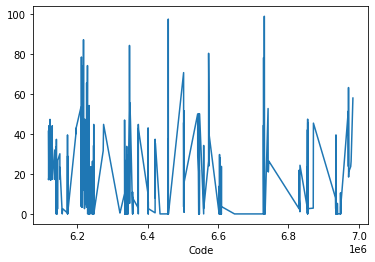

In [11]:
summarygapsstations.PercentageGaps.plot()

Here we can plot the gaps:

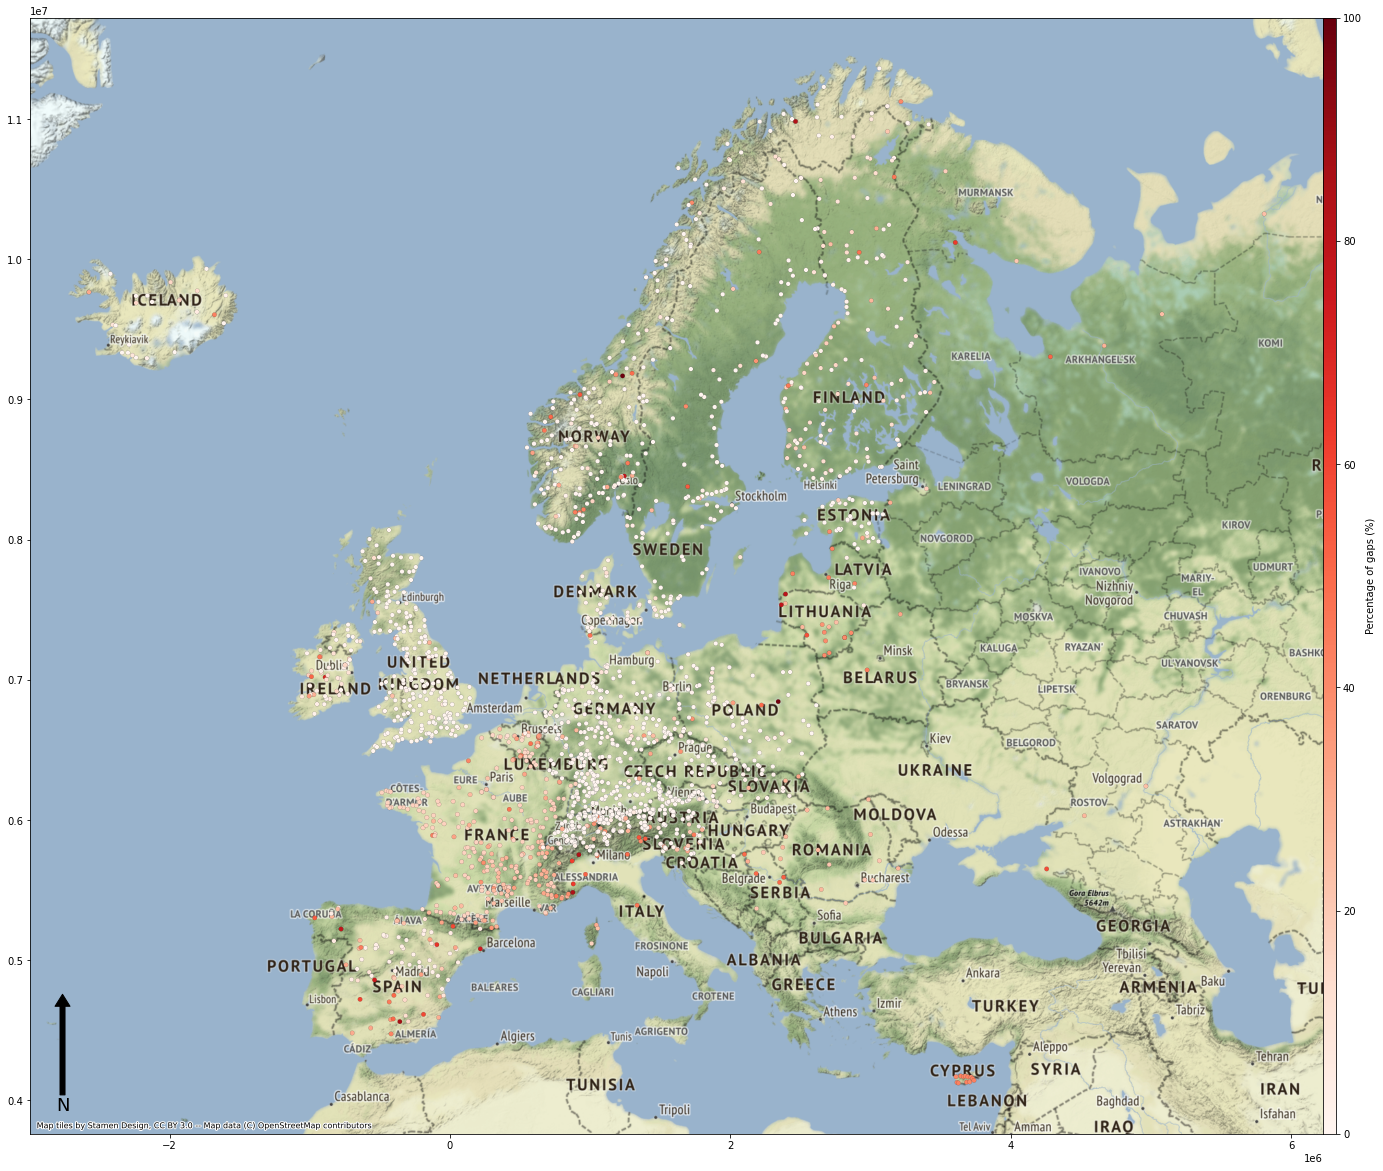

In [13]:
figplot, axesplot = geospatialfunctions.plotgapsmap(summarygapsstations = summarygapsstations, crsproj = 'epsg:4326', backmapproj = True, 
                                       figsizeproj = (23.4, 23.4), cmapproj = "Reds", legend_title = "Percentage of gaps (%)",
                                       legend_orientation = "vertical", pad_map = 0, markersize_map = 20,
                                       north_arrow = True, 
                                       set_map_limits = False, minx = -25, miny = 35, maxx = 30, maxy = 72)

#plot.savefig('world.jpg', bbox_inches='tight', dpi=300)

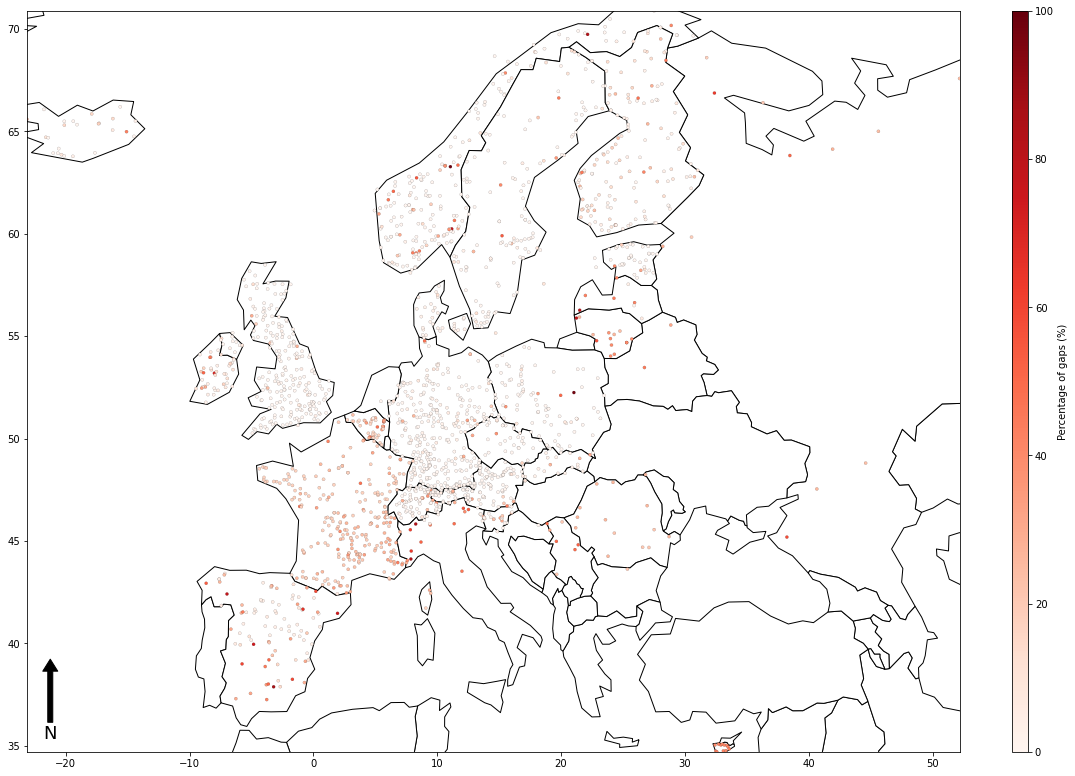

In [14]:
figplot, axesplot = geospatialfunctions.plotgapsmap(summarygapsstations = summarygapsstations, crsproj = 'epsg:4326', backmapproj = False, 
                                       figsizeproj = (23.4, 23.4), cmapproj = "Reds", legend_title = "Percentage of gaps (%)",
                                       legend_orientation = "vertical", pad_map = -3.5, markersize_map = 10,
                                       north_arrow = True, 
                                       set_map_limits = False, minx = -25, miny = 35, maxx = 30, maxy = 72)

#plot.savefig('world.jpg', bbox_inches='tight', dpi=300)

(<Figure size 1080x2160 with 1 Axes>, <AxesSubplot:>)

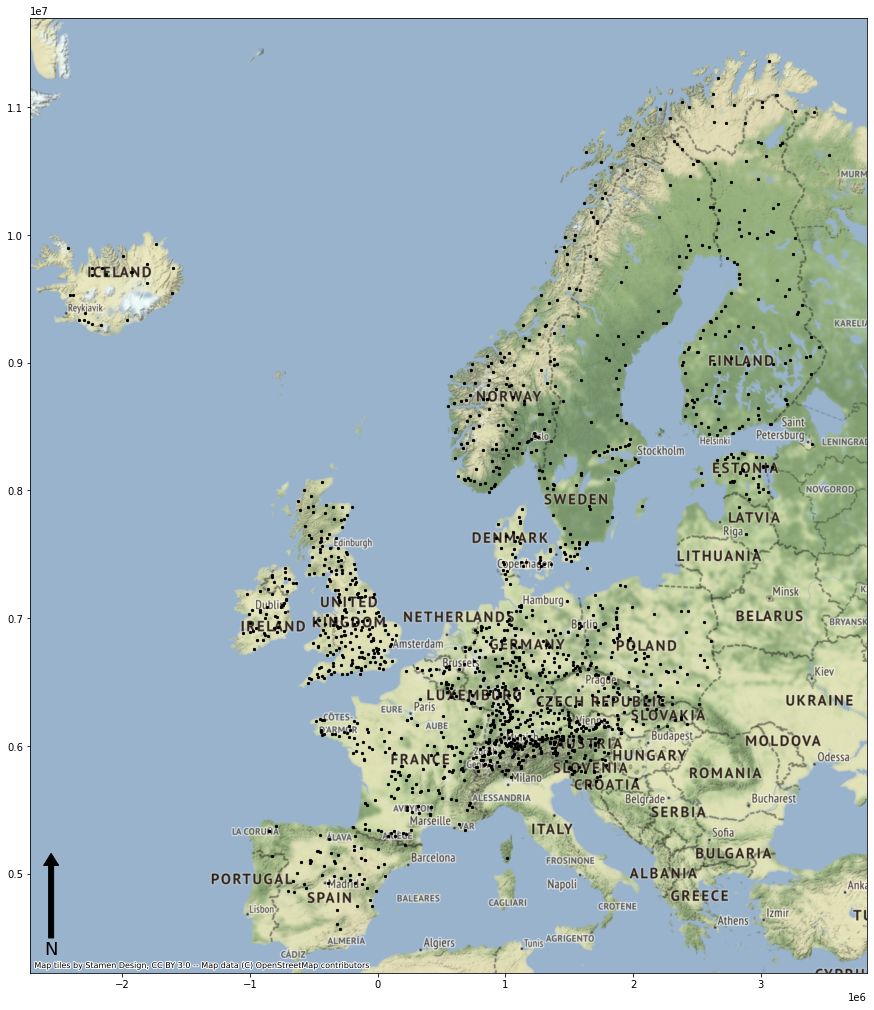

In [15]:
geospatialfunctions.plotpointsmap(summarygapsstations[summarygapsstations.PercentageGaps < 20.0], showcodes = False,  
                                  backmapproj = True,
                                  markersize_map = 5, 
                                  north_arrow = True, 
                                  set_map_limits = True,
                                  minx = -25, miny = 35, maxx = 30, maxy = 72)

Here we do not do any further modification, but we set the grdc number as the index:

In [16]:
network_cond_3 = network_cond_2.set_index("grdc_no")
network_cond_3

wmo_reg  sub_reg        river                station country  \
grdc_no                                                                 
6118130        6     6180  ABER VRAC'H                DRENNEC      FR   
6118150        6     6180      GUILLEC              TREZILIDE      FR   
6118160        6     6180        PENZE        TAULE (PENHOAT)      FR   
6118165        6     6180        RISLE                    RAI      FR   
6118175        6     6180       JARLOT             PLOUGONVEN      FR   
...          ...      ...          ...                    ...     ...   
6971130        6     6712       TULOMA  VERKHNE-TULOMSKIY GES      RU   
6971600        6     6713      VARZUGA                VARZUGA      RU   
6977100        6     6771        VOLGA  VOLGOGRAD POWER PLANT      RU   
6978250        6     6781          DON            RAZDORSKAYA      RU   
6983350        6     6831       KUBAN'              TIKHOVSKY      RU   

               lat       long       area  altitude     d_start  ... m_start  \
grdc_no                                                         ...           
6118130  48.530410  -4.362693       24.0     90.60  1966-01-01  ...     NaN   
6118150  48.615037  -4.077011       43.0     91.10  1966-01-01  ...     NaN   
6118160  48.584822  -3.924127      141.0     61.97  1967-01-01  ...     NaN   
6118165  48.747942   0.580580      149.0    255.45  1965-01-01  ...     NaN   
6118175  48.565562  -3.800485       44.0     73.86  1966-01-01  ...     NaN   
...            ...        ...        ...       ...         ...  ...     ...   
6971130  68.600000  31.750000    17500.0   -999.00  1935-01-01  ...  1934.0   
6971600  66.400000  36.300000     7940.0      9.00  1979-01-01  ...  1935.0   
6977100  48.804722  44.585833  1360000.0   -999.00  1962-01-01  ...  1879.0   
6978250  47.540833  40.647222   378000.0     58.00  1952-01-01  ...  1881.0   
6983350  45.191111  38.229167    48100.0      5.00  1936-01-01  ...  1911.0   

          m_end  m_yrs     m_miss  t_start  t_end  t_yrs  lta_discharge  \
grdc_no                                                                   
6118130     NaN    NaN        NaN     1966   2012     47          0.448   
6118150     NaN    NaN        NaN     1966   2012     47          0.682   
6118160     NaN    NaN        NaN     1967   2012     46          2.813   
6118165     NaN    NaN        NaN     1965   2012     48          1.379   
6118175     NaN    NaN        NaN     1966   2012     47          0.712   
...         ...    ...        ...      ...    ...    ...            ...   
6971130  2017.0   84.0  25.349301     1934   2017     84        193.903   
6971600  1992.0   58.0   0.288600     1935   2011     77          91.75   
6977100  1984.0  106.0  17.924528     1879   2010    132       7827.676   
6978250  1984.0  104.0   3.453815     1881   2010    130        681.961   
6983350  1985.0   75.0  25.531915     1911   2002     92        369.252   

                 r_volume_yr        r_height_yr  
grdc_no                                          
6118130          0.014128128            588.672  
6118150          0.021507552  500.1756279069768  
6118160  0.08871076800000001  629.1543829787234  
6118165          0.043488144  291.8667382550336  
6118175          0.022453632  510.3098181818181  
...                      ...                ...  
6971130          6.114925008  349.4242861714285  
6971600             2.893428  364.4115869017632  
6977100        246.853590336  181.5099928941177  
6978250         21.506322096          56.895032  
6983350         11.644731072  242.0942010810811  

[1943 rows x 23 columns]

In [17]:
summarygapsstations["Country"] = network_cond_3.country
summarygapsstations["area"] = network_cond_3.area
summarygapsstations["elevation"] = network_cond_3.altitude
summarygapsstations["d_start"] = pd.to_datetime(network_cond_3.d_start)
summarygapsstations["d_end"] = pd.to_datetime(network_cond_3.d_end)


# It is also improtant to replace any -999 data to NaN:
summarygapsstations.replace(-999.0, np.nan, inplace=True)
summarygapsstations["area"].replace(0, np.nan, inplace=True)

summarygapsstations

CoordX     CoordY  NumGaps  PercentageGaps  \
Code                                                     
6118130  -4.362693  48.530410   2412.0       17.378774   
6118150  -4.077011  48.615037   2399.0       17.285107   
6118160  -3.924127  48.584822   2408.0       17.349953   
6118165   0.580580  48.747942   3486.0       25.117083   
6118175  -3.800485  48.565562   2578.0       18.574825   
...            ...        ...      ...             ...   
6971130  31.750000  68.600000   2558.0       18.430723   
6971600  36.300000  66.400000   2922.0       21.053390   
6977100  44.585833  48.804722   3287.0       23.683262   
6978250  40.647222  47.540833   3654.0       26.327545   
6983350  38.229167  45.191111   8036.0       57.900425   

                          geometry Country       area  elevation    d_start  \
Code                                                                          
6118130  POINT (-4.36269 48.53041)      FR       24.0      90.60 1966-01-01   
6118150  POINT (-4.07701 48.61504)      FR       43.0      91.10 1966-01-01   
6118160  POINT (-3.92413 48.58482)      FR      141.0      61.97 1967-01-01   
6118165   POINT (0.58058 48.74794)      FR      149.0     255.45 1965-01-01   
6118175  POINT (-3.80049 48.56556)      FR       44.0      73.86 1966-01-01   
...                            ...     ...        ...        ...        ...   
6971130  POINT (31.75000 68.60000)      RU    17500.0        NaN 1935-01-01   
6971600  POINT (36.30000 66.40000)      RU     7940.0       9.00 1979-01-01   
6977100  POINT (44.58583 48.80472)      RU  1360000.0        NaN 1962-01-01   
6978250  POINT (40.64722 47.54083)      RU   378000.0      58.00 1952-01-01   
6983350  POINT (38.22917 45.19111)      RU    48100.0       5.00 1936-01-01   

             d_end  
Code                
6118130 2012-01-01  
6118150 2012-01-01  
6118160 2012-01-01  
6118165 2012-01-01  
6118175 2012-01-01  
...            ...  
6971130 2011-01-01  
6971600 2011-01-01  
6977100 2010-01-01  
6978250 2010-01-01  
6983350 2002-01-01  

[1943 rows x 10 columns]

In [18]:
summarygapsstations["area"].min()

0.1

Here we can plot our dataset with the circles proportional to their respective catchment area:

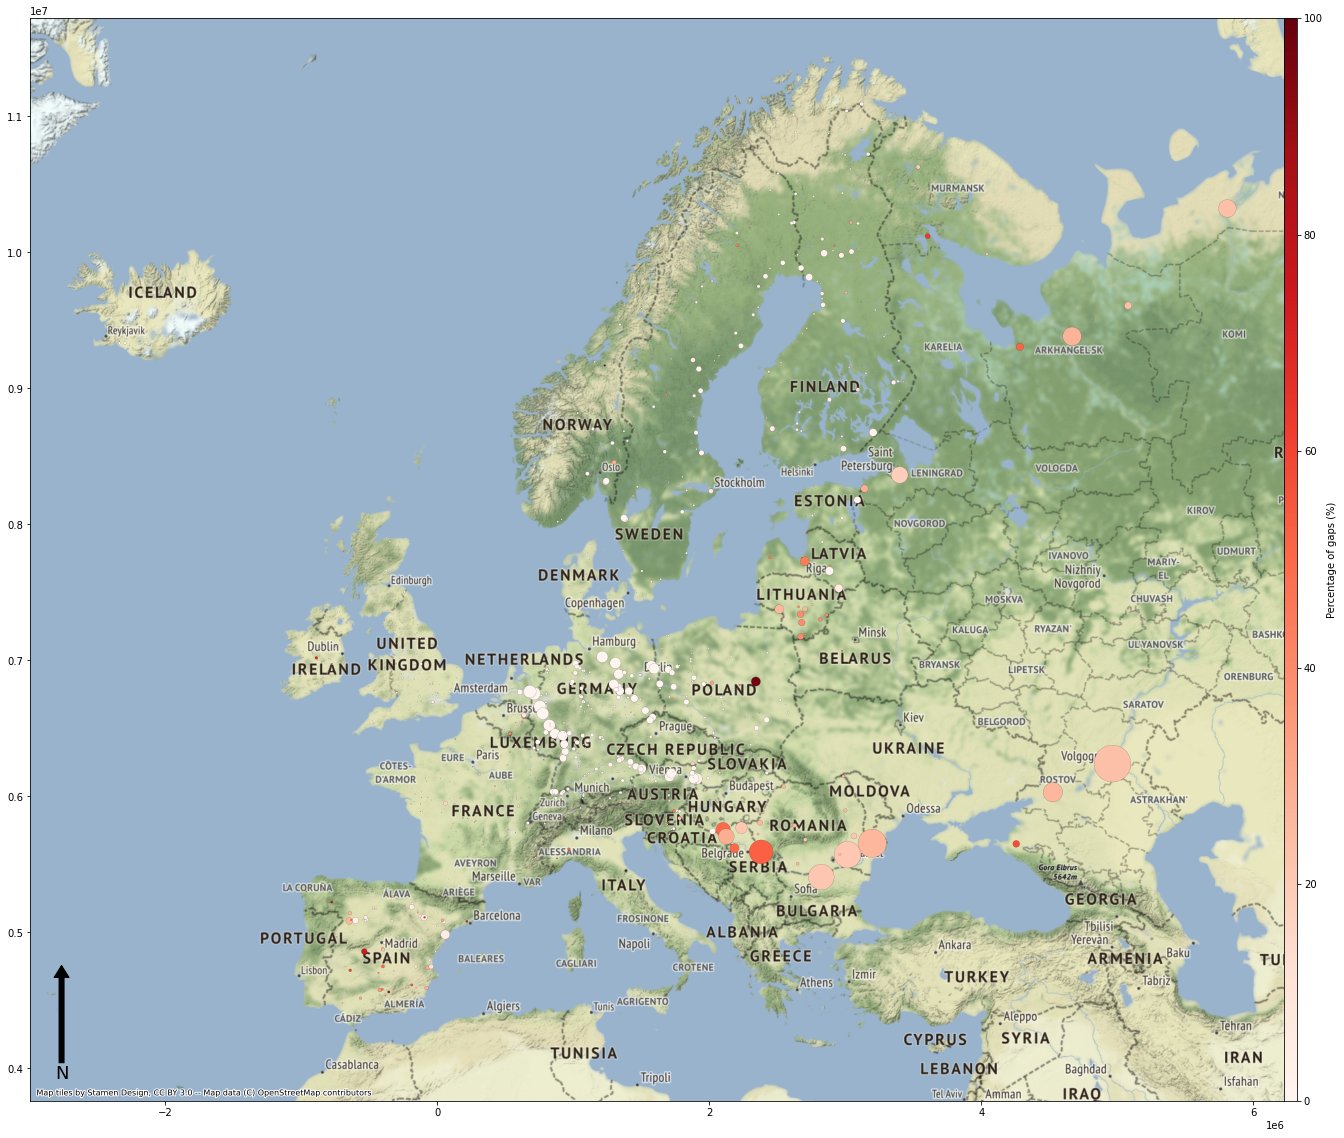

In [19]:
figplot, axesplot = geospatialfunctions.plotgapsmap(summarygapsstations = summarygapsstations,
                                       crsproj = 'epsg:4326', backmapproj = True, 
                                       figsizeproj = (22.7, 22.7), cmapproj = "Reds", legend_title = "Percentage of gaps (%)",
                                       legend_orientation = "vertical", pad_map = 0, linewidth_marker = 0.1,
                                       markersize_map = summarygapsstations['area']/1000,
                                       north_arrow = True, 
                                       set_map_limits = False, minx = -11, miny = 50, maxx = -6, maxy = 56)

#plot.savefig('world.jpg', bbox_inches='tight', dpi=300)

In [20]:
summarygapsstations

CoordX     CoordY  NumGaps  PercentageGaps  \
Code                                                     
6118130  -4.362693  48.530410   2412.0       17.378774   
6118150  -4.077011  48.615037   2399.0       17.285107   
6118160  -3.924127  48.584822   2408.0       17.349953   
6118165   0.580580  48.747942   3486.0       25.117083   
6118175  -3.800485  48.565562   2578.0       18.574825   
...            ...        ...      ...             ...   
6971130  31.750000  68.600000   2558.0       18.430723   
6971600  36.300000  66.400000   2922.0       21.053390   
6977100  44.585833  48.804722   3287.0       23.683262   
6978250  40.647222  47.540833   3654.0       26.327545   
6983350  38.229167  45.191111   8036.0       57.900425   

                          geometry Country       area  elevation    d_start  \
Code                                                                          
6118130  POINT (-4.36269 48.53041)      FR       24.0      90.60 1966-01-01   
6118150  POINT (-4.07701 48.61504)      FR       43.0      91.10 1966-01-01   
6118160  POINT (-3.92413 48.58482)      FR      141.0      61.97 1967-01-01   
6118165   POINT (0.58058 48.74794)      FR      149.0     255.45 1965-01-01   
6118175  POINT (-3.80049 48.56556)      FR       44.0      73.86 1966-01-01   
...                            ...     ...        ...        ...        ...   
6971130  POINT (31.75000 68.60000)      RU    17500.0        NaN 1935-01-01   
6971600  POINT (36.30000 66.40000)      RU     7940.0       9.00 1979-01-01   
6977100  POINT (44.58583 48.80472)      RU  1360000.0        NaN 1962-01-01   
6978250  POINT (40.64722 47.54083)      RU   378000.0      58.00 1952-01-01   
6983350  POINT (38.22917 45.19111)      RU    48100.0       5.00 1936-01-01   

             d_end  
Code                
6118130 2012-01-01  
6118150 2012-01-01  
6118160 2012-01-01  
6118165 2012-01-01  
6118175 2012-01-01  
...            ...  
6971130 2011-01-01  
6971600 2011-01-01  
6977100 2010-01-01  
6978250 2010-01-01  
6983350 2002-01-01  

[1943 rows x 10 columns]

<AxesSubplot:>

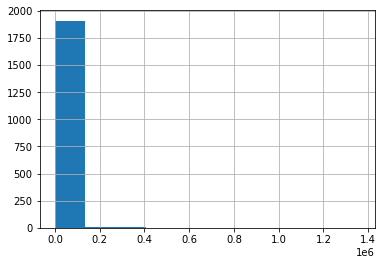

In [21]:
summarygapsstations.area.hist()

In [22]:
summarygapsstations.describe()

CoordX       CoordY       NumGaps  PercentageGaps          area  \
count  1943.000000  1943.000000   1943.000000     1943.000000  1.925000e+03   
mean      9.564295    52.603498   1207.627895        8.701116  7.675116e+03   
std      10.023693     7.151614   1949.365910       14.045435  4.930137e+04   
min     -23.127190    34.708333      0.000000        0.000000  1.000000e-01   
25%       2.442273    47.504136      0.000000        0.000000  1.354000e+02   
50%       9.456837    51.097604     85.000000        0.612436  4.237000e+02   
75%      15.419385    58.206834   2350.000000       16.932056  2.107000e+03   
max      52.170000    70.879230  13711.000000       98.789538  1.360000e+06   

         elevation  
count  1756.000000  
mean    275.753258  
std     329.107395  
min      -1.080000  
25%      42.227250  
50%     155.000000  
75%     395.530000  
max    2065.900000

<AxesSubplot:>

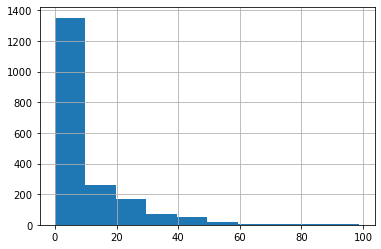

In [23]:
summarygapsstations.PercentageGaps.T.hist()

Here we can check the amount of stations and percentage of errors per country:

In [24]:
summarygapsstations

CoordX     CoordY  NumGaps  PercentageGaps  \
Code                                                     
6118130  -4.362693  48.530410   2412.0       17.378774   
6118150  -4.077011  48.615037   2399.0       17.285107   
6118160  -3.924127  48.584822   2408.0       17.349953   
6118165   0.580580  48.747942   3486.0       25.117083   
6118175  -3.800485  48.565562   2578.0       18.574825   
...            ...        ...      ...             ...   
6971130  31.750000  68.600000   2558.0       18.430723   
6971600  36.300000  66.400000   2922.0       21.053390   
6977100  44.585833  48.804722   3287.0       23.683262   
6978250  40.647222  47.540833   3654.0       26.327545   
6983350  38.229167  45.191111   8036.0       57.900425   

                          geometry Country       area  elevation    d_start  \
Code                                                                          
6118130  POINT (-4.36269 48.53041)      FR       24.0      90.60 1966-01-01   
6118150  POINT (-4.07701 48.61504)      FR       43.0      91.10 1966-01-01   
6118160  POINT (-3.92413 48.58482)      FR      141.0      61.97 1967-01-01   
6118165   POINT (0.58058 48.74794)      FR      149.0     255.45 1965-01-01   
6118175  POINT (-3.80049 48.56556)      FR       44.0      73.86 1966-01-01   
...                            ...     ...        ...        ...        ...   
6971130  POINT (31.75000 68.60000)      RU    17500.0        NaN 1935-01-01   
6971600  POINT (36.30000 66.40000)      RU     7940.0       9.00 1979-01-01   
6977100  POINT (44.58583 48.80472)      RU  1360000.0        NaN 1962-01-01   
6978250  POINT (40.64722 47.54083)      RU   378000.0      58.00 1952-01-01   
6983350  POINT (38.22917 45.19111)      RU    48100.0       5.00 1936-01-01   

             d_end  
Code                
6118130 2012-01-01  
6118150 2012-01-01  
6118160 2012-01-01  
6118165 2012-01-01  
6118175 2012-01-01  
...            ...  
6971130 2011-01-01  
6971600 2011-01-01  
6977100 2010-01-01  
6978250 2010-01-01  
6983350 2002-01-01  

[1943 rows x 10 columns]

In [25]:
stationsdescribe =pd.DataFrame()
stationsdescribe["stations"] = summarygapsstations.loc[:,["PercentageGaps", "Country"]].groupby(by=["Country"]).count()
stationsdescribe["min"] = summarygapsstations.loc[:,["PercentageGaps", "Country"]].groupby(by=["Country"]).min()
stationsdescribe["P25"] = summarygapsstations.loc[:,["PercentageGaps", "Country"]].groupby(by=["Country"]).quantile(q = 0.25)
stationsdescribe["P50"] = summarygapsstations.loc[:,["PercentageGaps", "Country"]].groupby(by=["Country"]).quantile(q = 0.50)
stationsdescribe["mean"] = summarygapsstations.loc[:,["PercentageGaps", "Country"]].groupby(by=["Country"]).mean()
stationsdescribe["P75"] = summarygapsstations.loc[:,["PercentageGaps", "Country"]].groupby(by=["Country"]).quantile(q = 0.75)
stationsdescribe["max"] = summarygapsstations.loc[:,["PercentageGaps", "Country"]].groupby(by=["Country"]).max()



stationsdescribe["d_start_min"] = summarygapsstations.loc[:,["d_start", "Country"]].groupby(by=["Country"]).min()
stationsdescribe["d_end_max"] = summarygapsstations.loc[:,["d_end", "Country"]].groupby(by=["Country"]).max()


stationsdescribe

stations        min        P25        P50       mean        P75  \
Country                                                                    
AT            120   0.000000   0.000000   0.000000   2.025902   0.000000   
BE             37   2.629872  15.786440  15.786440  20.879298  26.644571   
BY              2  31.572880  34.865624  38.158369  38.158369  41.451113   
CH             81   0.000000   0.000000   0.000000   3.951969   0.000000   
CY             12  40.139780  40.183010  42.769652  41.917045  42.771453   
CZ             28   0.000000   0.000000   0.000000   3.085854   0.000000   
DE            320   0.000000   0.000000   0.000000   1.858924   0.471936   
DK             32   0.000000   2.629872   2.629872   3.040115   2.629872   
EE             39   0.000000   0.000000   0.000000   3.548249   0.000000   
ES             92   3.292744   3.858347   7.900425  19.245372  30.097630   
FI            139   0.000000   2.629872   3.047770   8.880297  13.156567   
FR            246  17.141004  17.308524  18.297428  21.920437  25.090064   
GB            226   0.000000   0.000000   0.000000   1.234309   0.241372   
HR              1   0.000000   0.000000   0.000000   0.000000   0.000000   
IE             41   0.821385   3.761078   7.940053  12.702117  16.081850   
IS             24   0.000000   0.000000   1.894949   7.333021  10.786080   
IT             12   5.259745  41.479934  50.489949  48.326609  57.023201   
LT             15  23.985878  31.580085  39.476908  43.362394  48.076230   
LV              7   0.000000   4.607681  42.106780  25.847889  42.438216   
NL              6   0.000000   2.379494  21.600980  19.654394  36.477772   
NO            179   0.000000   0.000000   0.000000   6.655246   2.201167   
PL             84   0.000000   0.000000   0.000000   3.729513   0.003603   
RO             16  21.053390  21.161467  26.313135  26.370776  26.421212   
RS              6  21.053390  23.281576  39.473305  36.917886  49.996397   
RU             11  18.423518  22.368326  24.158801  32.345139  39.487715   
SE            126   0.000000   0.000000   0.000000   3.037077   0.126090   
SI             24   0.000000   0.000000   0.551192   8.022012  15.327113   
SK             17   2.629872   2.629872   2.629872   5.467846   2.629872   

               max d_start_min  d_end_max  
Country                                    
AT       44.736652  1950-01-01 2018-01-01  
BE       47.366525  1965-01-01 2017-01-01  
BY       44.743858  1978-01-01 2017-01-01  
CH       39.476908  1869-01-01 2019-01-01  
CY       42.985806  1965-01-01 2003-01-01  
CZ       37.279343  1887-01-01 2020-01-01  
DE       46.927012  1806-01-01 2020-01-01  
DK       12.666619  1917-01-01 2018-01-01  
EE       39.469702  1903-01-01 2021-01-01  
ES       87.052381  1912-01-01 2017-01-01  
FI       47.366525  1863-01-01 2019-01-01  
FR       84.206355  1904-01-01 2012-01-01  
GB       29.692341  1879-01-01 2021-01-01  
HR        0.000000  1926-01-01 2022-01-01  
IE       70.617480  1939-01-01 2022-01-01  
IS       42.985806  1932-01-01 2021-01-01  
IT       83.529073  1845-01-01 2016-01-01  
LT       80.272354  1812-01-01 2009-01-01  
LV       44.736652  1936-01-01 2021-01-01  
NL       37.315369  1901-01-01 2020-01-01  
NO       98.789538  1871-01-01 2019-01-01  
PL       97.370128  1921-01-01 2021-01-01  
RO       52.669501  1931-01-01 2010-01-01  
RS       50.118885  1971-01-01 2010-01-01  
RU       63.160170  1883-01-01 2011-01-01  
SE       54.168168  1807-01-01 2022-01-01  
SI       34.217163  1928-01-01 2019-01-01  
SK       26.752648  1900-01-01 2017-01-01

#### Some observation about the countries:

AT (Austria): Good coverage, but we could work with the LAMAH-CE;

BE (Belgium): Official data downloaded;

BY (Belarus): Only one long-term station;

CH (Switzerland): Camels data downloaded;

CY (Cyprus): Data until only the 2005s;

CZ (Czechia): Good amount of long-term data;

DE (Germany): Good amount of long-term data (even longer if needed);

DK (Denmark): Good amount of long-term data;

EE (Estonia): Good amount of long-term data;

ES (Spain): Official data downloaded;

FI (Finland): Good amount of long-term data until 2019;

FR (France): Official data downloaded;

GB (Great Britain): Camels + official data downloaded;

HR (Croatia): Only one station, but no gaps;

IE (Ireland): Many gaps, but overal good time-range;

IS (Iceland): Some gaps, but overal good time-range;

IT (Italy): Really bad situation. Many of the available data is in the upper north, where the Camels CH already covers;

LT (Lithuania): Some gaps, but data reach up to 2010;

LV (Latvia): Only some stations with long term.

NL (The Netherlands): 3 out of 6 with long term time-series and little gaps (data until 2020);

NO (Norway): Good amount of data. They reach untill 2020, and there are some gaps.

PL (Poland): Good amount of long-term data and little gaps;

RO (Romania): Data goes until 2011, but there are little gaps;

RS (Serbia): Data goes untill 2011, but there are only 3 out of 6 stations without major gaps. 

RU (Russia): Some gaps and data goes until 2012.

SE (Sweden): Official data downloaded;

SI ( Slovenia): Good amount of long term data. 

SK ( Slovakia): Good amount of long term data, but it goes only until 2018. 

#### a. Here we have some plots per country showing the behaviour of the stations in general terms:

1. Boxplots:

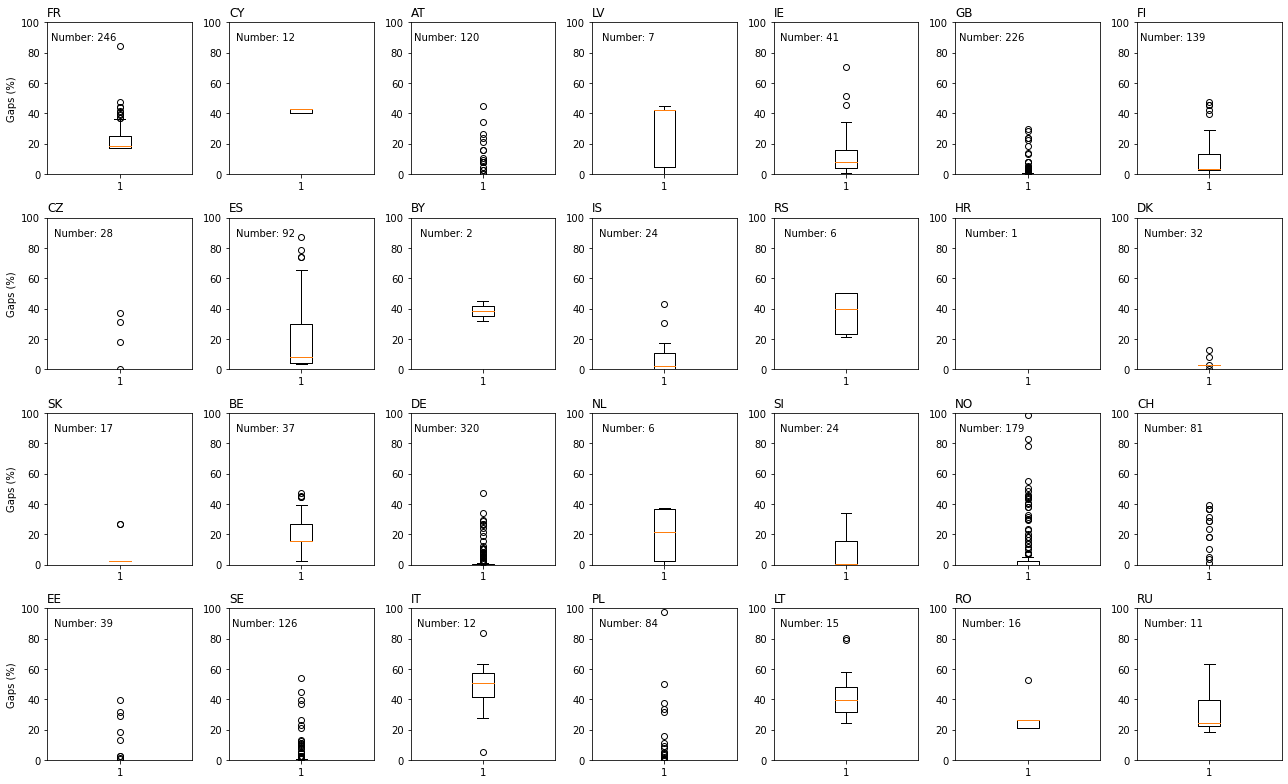

In [27]:
figplot, axesplot = geospatialfunctions.plotboxplots(numr = 4, numc = 7, datatoplot = summarygapsstations, setylim = True, 
            ymin = 0, ymax = 100, figsizeproj = (18, 11), ylabelplot = "Gaps (%)",
            Cluster = "Country", Descriptor = "PercentageGaps", 
            font_size_plot = {'font.size': 10})

2. Histograms:

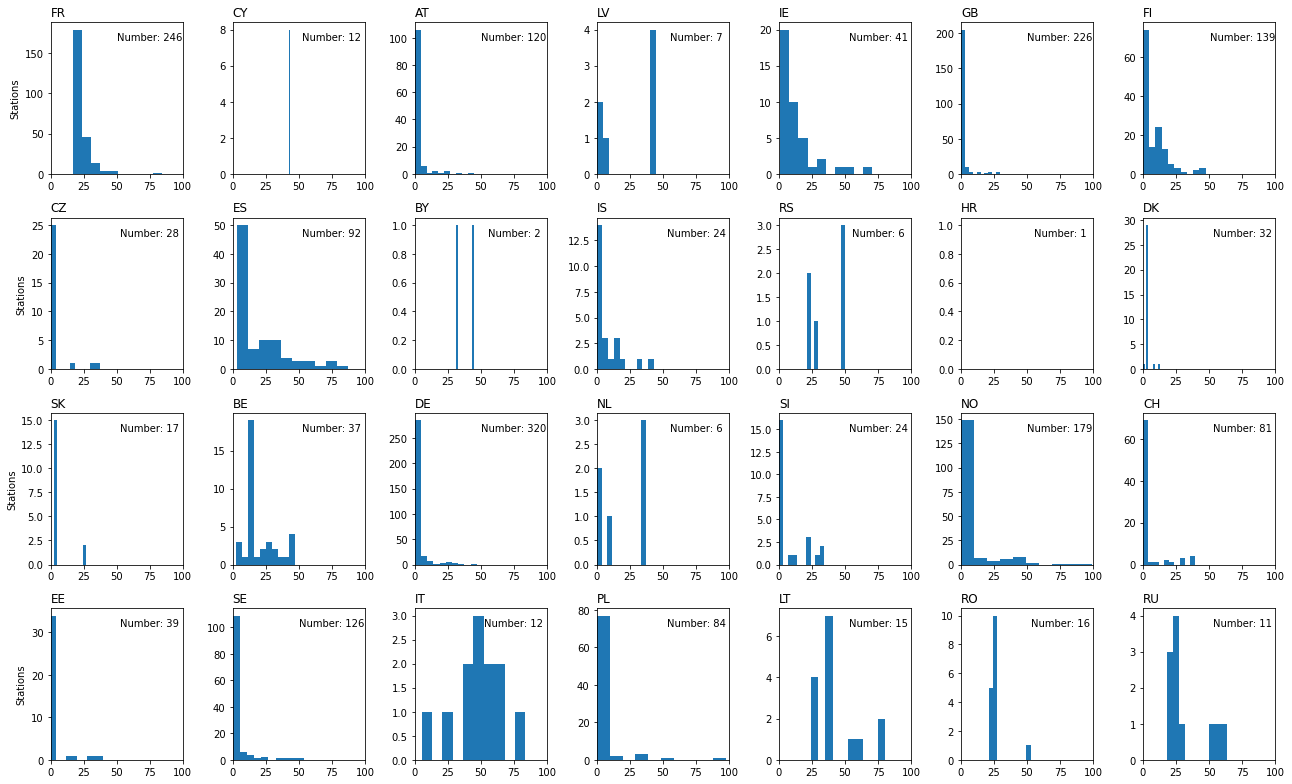

In [28]:
figplot, axesplot = geospatialfunctions.plothistograms(numr = 4, numc = 7, datatoplot = summarygapsstations, setylim = False, 
            ymin = 0, ymax = 100, figsizeproj = (18, 11), ylabelplot = "Stations",
            Cluster = "Country", Descriptor = "PercentageGaps", 
            font_size_plot = {'font.size': 10})

3. Gannt charts:

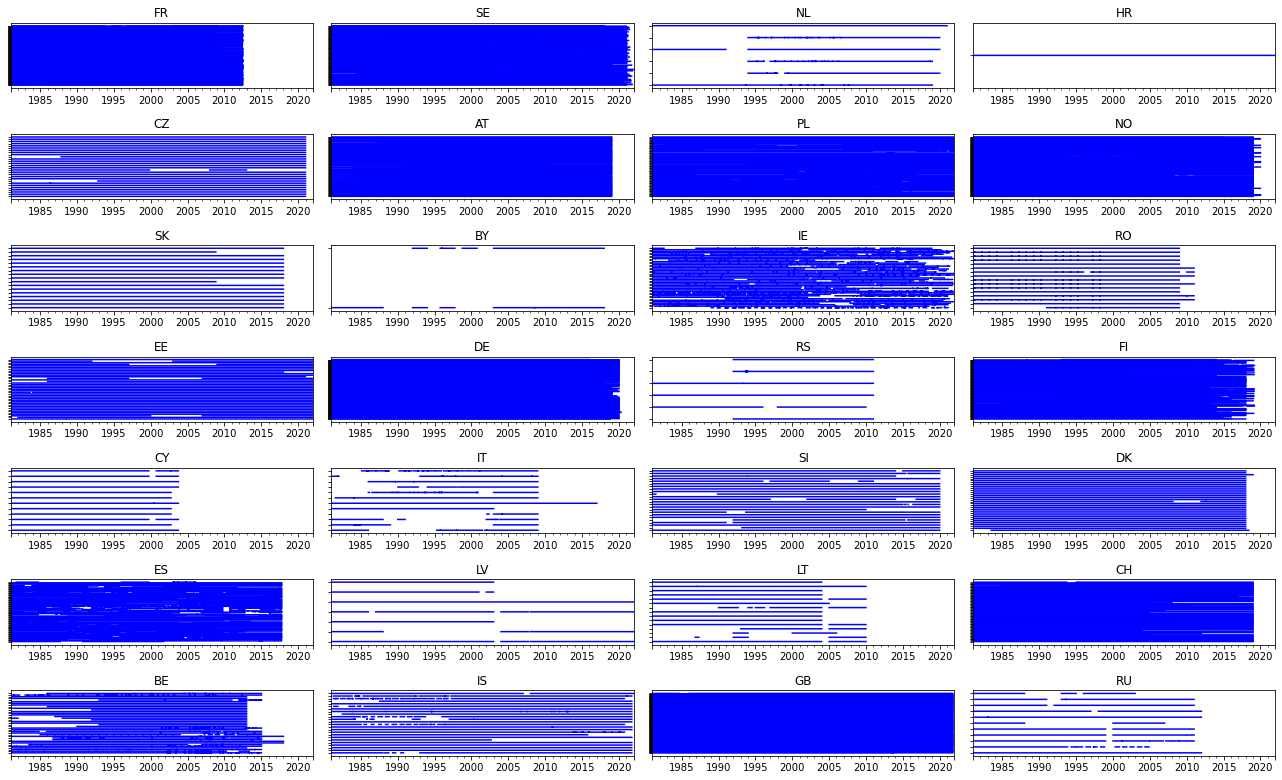

In [29]:
figplot, axesplot = geospatialfunctions.plotganntplots(numr = 7, numc = 4, timeseriesfinal_used = timeseriesfinal_used, 
               summarygapsstations = summarygapsstations,
               setylim = False,  ymin = 0, ymax = 100, figsize_chart = (18, 11), 
                color_chart = "blue", fontsize_chart = 10, facecolor_chart = "white", title_chart = "Title")

4. Stations desscription:

In [30]:
stationsdescribe

stations        min        P25        P50       mean        P75  \
Country                                                                    
AT            120   0.000000   0.000000   0.000000   2.025902   0.000000   
BE             37   2.629872  15.786440  15.786440  20.879298  26.644571   
BY              2  31.572880  34.865624  38.158369  38.158369  41.451113   
CH             81   0.000000   0.000000   0.000000   3.951969   0.000000   
CY             12  40.139780  40.183010  42.769652  41.917045  42.771453   
CZ             28   0.000000   0.000000   0.000000   3.085854   0.000000   
DE            320   0.000000   0.000000   0.000000   1.858924   0.471936   
DK             32   0.000000   2.629872   2.629872   3.040115   2.629872   
EE             39   0.000000   0.000000   0.000000   3.548249   0.000000   
ES             92   3.292744   3.858347   7.900425  19.245372  30.097630   
FI            139   0.000000   2.629872   3.047770   8.880297  13.156567   
FR            246  17.141004  17.308524  18.297428  21.920437  25.090064   
GB            226   0.000000   0.000000   0.000000   1.234309   0.241372   
HR              1   0.000000   0.000000   0.000000   0.000000   0.000000   
IE             41   0.821385   3.761078   7.940053  12.702117  16.081850   
IS             24   0.000000   0.000000   1.894949   7.333021  10.786080   
IT             12   5.259745  41.479934  50.489949  48.326609  57.023201   
LT             15  23.985878  31.580085  39.476908  43.362394  48.076230   
LV              7   0.000000   4.607681  42.106780  25.847889  42.438216   
NL              6   0.000000   2.379494  21.600980  19.654394  36.477772   
NO            179   0.000000   0.000000   0.000000   6.655246   2.201167   
PL             84   0.000000   0.000000   0.000000   3.729513   0.003603   
RO             16  21.053390  21.161467  26.313135  26.370776  26.421212   
RS              6  21.053390  23.281576  39.473305  36.917886  49.996397   
RU             11  18.423518  22.368326  24.158801  32.345139  39.487715   
SE            126   0.000000   0.000000   0.000000   3.037077   0.126090   
SI             24   0.000000   0.000000   0.551192   8.022012  15.327113   
SK             17   2.629872   2.629872   2.629872   5.467846   2.629872   

               max d_start_min  d_end_max  
Country                                    
AT       44.736652  1950-01-01 2018-01-01  
BE       47.366525  1965-01-01 2017-01-01  
BY       44.743858  1978-01-01 2017-01-01  
CH       39.476908  1869-01-01 2019-01-01  
CY       42.985806  1965-01-01 2003-01-01  
CZ       37.279343  1887-01-01 2020-01-01  
DE       46.927012  1806-01-01 2020-01-01  
DK       12.666619  1917-01-01 2018-01-01  
EE       39.469702  1903-01-01 2021-01-01  
ES       87.052381  1912-01-01 2017-01-01  
FI       47.366525  1863-01-01 2019-01-01  
FR       84.206355  1904-01-01 2012-01-01  
GB       29.692341  1879-01-01 2021-01-01  
HR        0.000000  1926-01-01 2022-01-01  
IE       70.617480  1939-01-01 2022-01-01  
IS       42.985806  1932-01-01 2021-01-01  
IT       83.529073  1845-01-01 2016-01-01  
LT       80.272354  1812-01-01 2009-01-01  
LV       44.736652  1936-01-01 2021-01-01  
NL       37.315369  1901-01-01 2020-01-01  
NO       98.789538  1871-01-01 2019-01-01  
PL       97.370128  1921-01-01 2021-01-01  
RO       52.669501  1931-01-01 2010-01-01  
RS       50.118885  1971-01-01 2010-01-01  
RU       63.160170  1883-01-01 2011-01-01  
SE       54.168168  1807-01-01 2022-01-01  
SI       34.217163  1928-01-01 2019-01-01  
SK       26.752648  1900-01-01 2017-01-01

5. Plot the available points:

(<Figure size 1080x2160 with 1 Axes>, <AxesSubplot:>)

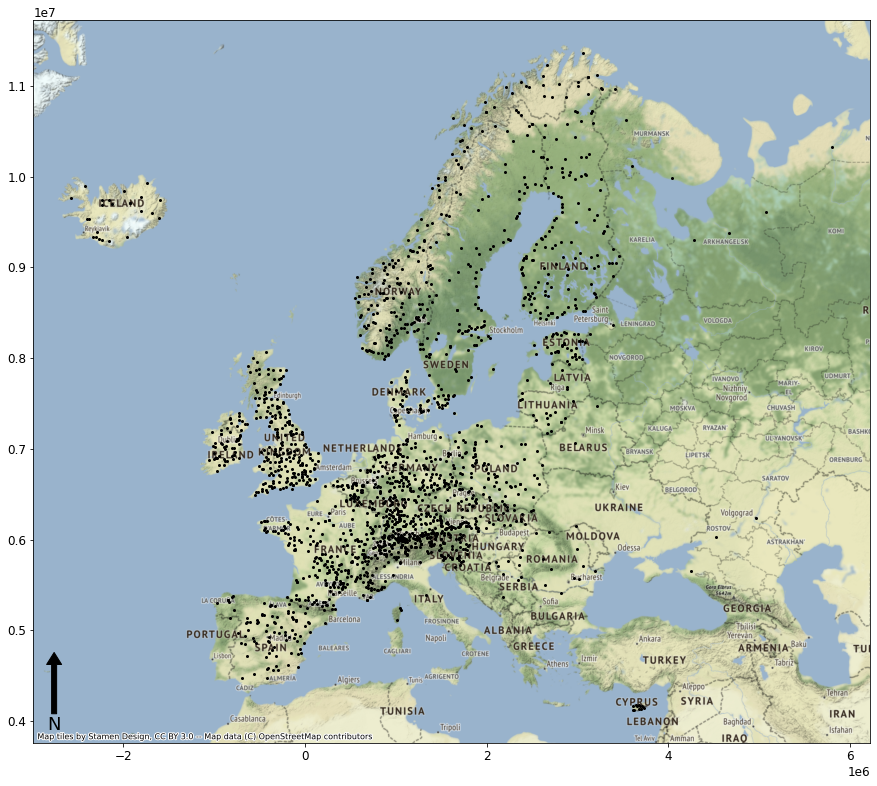

In [31]:
geospatialfunctions.plotpointsmap(summarygapsstations, showcodes = False,  
                                  backmapproj = True,
                                  markersize_map = 4.0, 
                                  north_arrow = True, 
                                  set_map_limits = True,
                                  minx = -25, miny = 35, maxx = 30, maxy = 72)

6. Here you can choose a country and plot the time-series:

In [33]:
idcondition = summarygapsstations[summarygapsstations.Country == "DK"].index.tolist()

timeseriesfinalcondition = timeseriesfinal_used.loc["1981":"2021", idcondition]
timeseriesfinalcondition

6933900  6934050  6934100  6934120  6934150  6934170  6934200  \
1981-01-01      NaN    2.500   28.470   32.376    11.18     8.65    6.333   
1981-01-02      NaN    2.300   28.030   29.512    11.37     8.90    6.446   
1981-01-03      NaN    4.212   29.640   34.053    12.10     9.35    6.785   
1981-01-04      NaN    3.554   42.165   37.123    12.51     9.70    8.521   
1981-01-05      NaN    3.079   41.559   37.394    12.50     9.75    8.742   
...             ...      ...      ...      ...      ...      ...      ...   
2021-12-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            6934250  6934270  6934300  ...  6934560  6934571  6934600  \
1981-01-01    37.19    48.26    3.500  ...    1.331    24.59    2.344   
1981-01-02    36.66    50.08    3.021  ...    1.237    23.86    2.039   
1981-01-03    38.60    51.56    2.766  ...    2.488    24.00    3.068   
1981-01-04    39.86    53.30    3.085  ...    2.743    24.21    3.782   
1981-01-05    38.78    53.21    2.614  ...    2.336    24.78    2.503   
...             ...      ...      ...  ...      ...      ...      ...   
2021-12-27      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2021-12-28      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2021-12-29      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2021-12-30      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2021-12-31      NaN      NaN      NaN  ...      NaN      NaN      NaN   

            6934620  6934700  6934720  6934750  6934800  6934860  6934870  
1981-01-01    6.587    14.97    1.981    9.857   11.978    19.72    2.796  
1981-01-02    6.228    17.04    2.032   11.000   10.776    19.97    2.755  
1981-01-03    8.251    19.64    2.294   12.740   15.011    20.79    3.505  
1981-01-04    9.362    24.46    2.657   15.170   14.748    22.54    3.459  
1981-01-05    7.080    24.34    2.746   14.440   11.896    22.04    2.951  
...             ...      ...      ...      ...      ...      ...      ...  
2021-12-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2021-12-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2021-12-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2021-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2021-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[14975 rows x 32 columns]

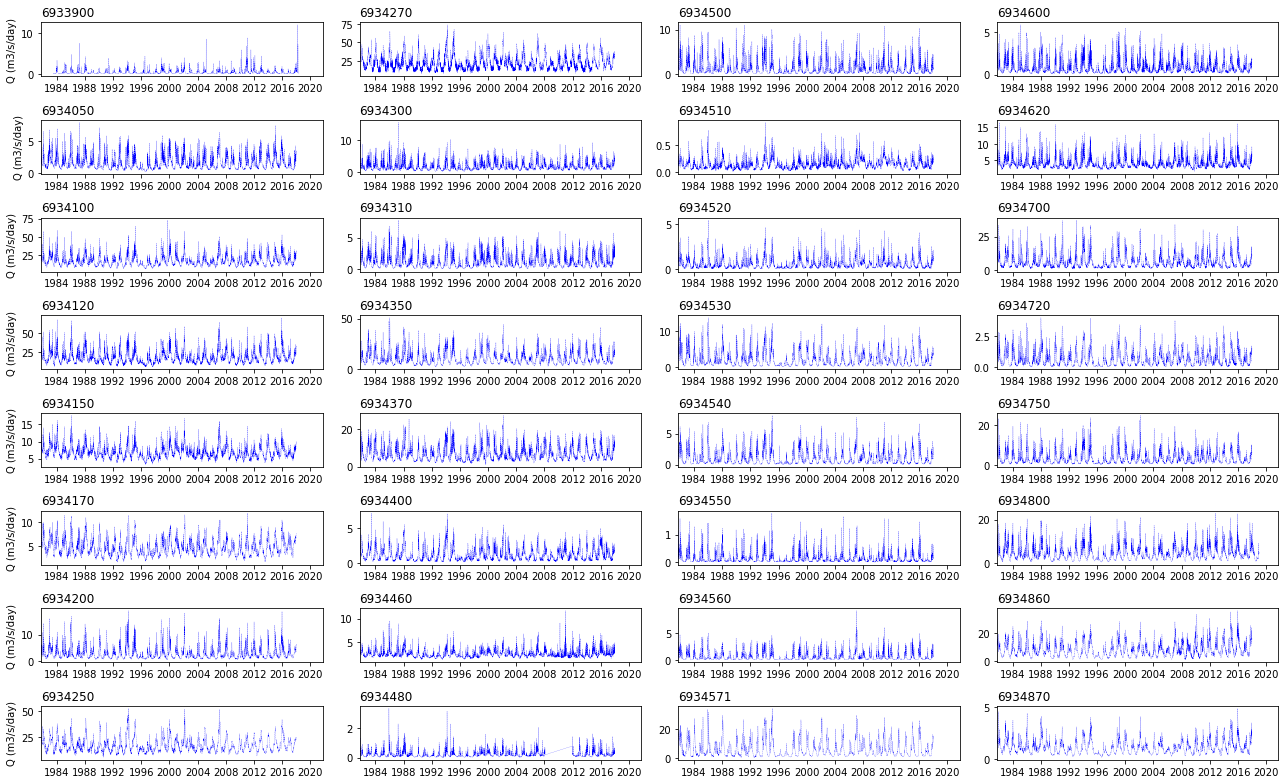

In [35]:
figplot, axesplot = geospatialfunctions.plottimeseries(numr = 8, numc = 4, datatoplot = timeseriesfinalcondition.loc[:, timeseriesfinalcondition.columns], 
                                   setylim = False, ymin = 0, ymax = 200, figsizeproj = (18, 11),
                                   colorgraph = "blue", linewidthproj = 0.2, linestyleproj = "-.",  
                                   ylabelplot = "Q (m3/s/day)", 
                                   datestart = datetime.date(1981, 10, 1), dateend = datetime.date(2021, 9, 30),
                                   setnumberofintervals = False, numberintervals = 2,
                                   fontsize_plot = 10)

Those two following codes are disabled since they would require a lot of space to be saved in this notebook:

#### c. Here we can check the gannt chart for each country individually:

In [28]:
#for country in tqdm.tqdm(stationsdescribe.index.tolist()):
#
#
#    idcondition = summarygapsstations[summarygapsstations.Country == country].index.tolist()
#    timeseriesfinal_gantt = timeseriesfinal_used.loc["1981":"2021", idcondition]
#
#    geospatialfunctions.plotganntchart(timeseriesfinal_gantt = timeseriesfinal_gantt, figsize_chart = (40, 20), 
#                 color_chart = "navy", fontsize_chart = 12,facecolor_chart = "white", title_chart = country)
#    
#    name = 'figures\GRDC\gannt' + "/" + country + "_gannt.jpg"
#    plot.savefig(name, bbox_inches='tight', dpi=300)

#### d. Here we can check the map plot for each country individually:

In [55]:
#for country in tqdm.tqdm(stationsdescribe.index.tolist()):
#
#
#   summarygapsstations_used = summarygapsstations[summarygapsstations.Country == country]
#
#
#    plot = geospatialfunctions.plotgapsmap(summarygapsstations = summarygapsstations_used,
#                                           crsproj = 'epsg:4326', backmapproj = True, 
#                                           figsizeproj = (11.7, 11.7), cmapproj = "Reds", legend_title = "Percentage of gaps (%)",
#                                           legend_orientation = "vertical", pad_map = 0, markersize_map = summarygapsstations_used.area/100,
#                                           north_arrow = True, 
#                                           set_map_limits = False, minx = -25, miny = 35, maxx = 30, maxy = 72)
#    
#    name = 'figures\GRDC\\maps' + "/" + country + "_maps.jpg"
#    plot.savefig(name, bbox_inches='tight', dpi=300)

###############################################################################################################################

5. At this point we can convert our streamflow dataset from m3/s to mm/day

But first it is interesting to check the number of catchments without area:

In [36]:
print("There are", summarygapsstations.area.isna().sum(), "stations without area assigned in our dataframe")

There are 18 stations without area assigned in our dataframe


Now we proceed with the conversion:

In [90]:
#%% #### 1. Define a function to convert streamflow from cubic meters per seconds (m3/s) to milimiters per day (mm/day):

def Q_from_m3s_mmday(timeseries_m3s, stations_infos):
    """
    Inputs
    ------------------
    timeseries_m3s = dataframe[Index = Datetime; columns = [stations-codes]]; 
    stations_infos = dataframe[Index = [stations-codes]; columns = [...,....,area]];
    
    Returns
    --------------------
    timeseries_mmday = dataframe[Index = Datetime; columns = [stations-codes]] 
        
    """   
    timeseries_mmday = (timeseries_m3s * 1000 * 24 * 3600) / (stations_infos.loc[timeseries_m3s.columns, "area"] * 1000 * 1000)
    
    return timeseries_mmday

In [91]:
timeseries_mmday = Q_from_m3s_mmday(timeseries_m3s = timeseriesfinal_used, stations_infos = summarygapsstations)
timeseries_mmday.loc[datetime.date(1981, 10, 1):datetime.date(2021, 9, 30), :]

6118130   6118150   6118160   6118165   6118175   6118185  \
1981-10-01   2.1960  3.255070  1.605447  0.405906  0.893455  0.168585   
1981-10-02   2.1708  3.074233  0.955915  0.405906  0.693164  0.222322   
1981-10-03   1.0692  1.336186  0.686298  0.405906  0.551782  0.145405   
1981-10-04   0.9108  0.769563  0.588255  0.371114  0.471273  0.121171   
1981-10-05   0.8640  0.649005  0.416681  0.440698  0.422182  0.104312   
...             ...       ...       ...       ...       ...       ...   
2021-09-26      NaN       NaN       NaN       NaN       NaN       NaN   
2021-09-27      NaN       NaN       NaN       NaN       NaN       NaN   
2021-09-28      NaN       NaN       NaN       NaN       NaN       NaN   
2021-09-29      NaN       NaN       NaN       NaN       NaN       NaN   
2021-09-30      NaN       NaN       NaN       NaN       NaN       NaN   

             6118195   6118205  6118230   6119010  ...   6970100   6970250  \
1981-10-01  0.696686  1.653791      NaN  1.795107  ...  0.279210  0.412138   
1981-10-02  0.602057  1.706798      NaN  1.811883  ...  0.279210  0.414621   
1981-10-03  0.569143  1.473571      NaN  1.677670  ...  0.266801  0.419586   
1981-10-04  0.522514  1.420564      NaN  1.556878  ...  0.257494  0.417103   
1981-10-05  0.469029  1.367558      NaN  1.469639  ...  0.249738  0.414621   
...              ...       ...      ...       ...  ...       ...       ...   
2021-09-26       NaN       NaN      NaN       NaN  ...       NaN       NaN   
2021-09-27       NaN       NaN      NaN       NaN  ...       NaN       NaN   
2021-09-28       NaN       NaN      NaN       NaN  ...       NaN       NaN   
2021-09-29       NaN       NaN      NaN       NaN  ...       NaN       NaN   
2021-09-30       NaN       NaN      NaN       NaN  ...       NaN       NaN   

             6970500   6970700   6970869   6971130   6971600   6977100  \
1981-10-01  0.539234  0.991385  0.607135  1.017051  1.371083  0.344329   
1981-10-02  0.586723  1.002462  0.553761  0.794880  1.316675  0.347506   
1981-10-03  0.626553  1.010769  0.577112  0.710949  1.196977  0.362753   
1981-10-04  0.652596  1.019077  0.480371  0.735634  1.077280  0.371012   
1981-10-05  0.652596  1.030154  0.560432  0.908434  1.022872  0.375459   
...              ...       ...       ...       ...       ...       ...   
2021-09-26       NaN       NaN       NaN       NaN       NaN       NaN   
2021-09-27       NaN       NaN       NaN       NaN       NaN       NaN   
2021-09-28       NaN       NaN       NaN       NaN       NaN       NaN   
2021-09-29       NaN       NaN       NaN       NaN       NaN       NaN   
2021-09-30       NaN       NaN       NaN       NaN       NaN       NaN   

             6978250   6983350  
1981-10-01  0.137829  0.616116  
1981-10-02  0.140571  0.616116  
1981-10-03  0.133943  0.619709  
1981-10-04  0.134629  0.616116  
1981-10-05  0.137829  0.610728  
...              ...       ...  
2021-09-26       NaN       NaN  
2021-09-27       NaN       NaN  
2021-09-28       NaN       NaN  
2021-09-29       NaN       NaN  
2021-09-30       NaN       NaN  

[14610 rows x 1943 columns]